In [2]:
import tensorflow as tf

In [3]:
#mount to your google driver
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/babydata/')

In [ ]:
ls

happybaby/  mybabyclassifier_model.h5  neutralbaby/  sadbaby/  testbaby1.jpg


In [ ]:
import glob
import tensorflow as tf
happy = glob.glob('/content/drive/My Drive/babydata/happybaby/*.png')
neutral = glob.glob('/content/drive/My Drive/babydata/neutralbaby/*.png')
sad = glob.glob('/content/drive/My Drive/babydata/sadbaby/*.png')

In [ ]:
happy = np.array(happy)
happy.shape

(218,)

In [ ]:


data =[]
labels = []
for i in happy:
  image = tf.keras.preprocessing.image.load_img(i, target_size = (300,300))
  image = np.array(image)
  data.append(image)
  labels.append(0)
for i in neutral:
  image = tf.keras.preprocessing.image.load_img(i, target_size = (300,300))
  image = np.array(image)
  data.append(image)
  labels.append(1)
for i in sad:
  image = tf.keras.preprocessing.image.load_img(i, target_size = (300,300))
  image = np.array(image)
  data.append(image)
  labels.append(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'PngImageFile'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  import sys


KeyboardInterrupt: ignored

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape

(735, 300, 300, 3)

In [ ]:
labels.shape

(735,)

In [ ]:
data

array([[[[ 94,  94, 104],
         [ 91,  91, 101],
         [ 88,  88,  98],
         ...,
         [193, 148, 153],
         [197, 152, 159],
         [197, 152, 159]],

        [[ 75,  75,  85],
         [ 72,  72,  82],
         [ 69,  69,  79],
         ...,
         [178, 136, 140],
         [186, 143, 150],
         [186, 143, 150]],

        [[ 63,  63,  73],
         [ 60,  60,  70],
         [ 58,  58,  67],
         ...,
         [167, 125, 129],
         [177, 134, 142],
         [177, 134, 142]],

        ...,

        [[177, 176, 182],
         [178, 177, 183],
         [179, 178, 184],
         ...,
         [137, 143, 159],
         [123, 129, 145],
         [123, 129, 145]],

        [[177, 176, 182],
         [178, 177, 183],
         [179, 178, 184],
         ...,
         [115, 121, 137],
         [ 98, 104, 120],
         [ 98, 104, 120]],

        [[177, 176, 182],
         [178, 177, 183],
         [179, 178, 184],
         ...,
         [115, 121, 137],
        

In [ ]:
from pandas.core.common import flatten


from tensorflow.keras import datasets, layers, models


model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(6, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 2)       56        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 2)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 4)       76        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 4)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 6)         222       
                                                                 
 flatten_1 (Flatten)         (None, 30246)            

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(data, labels, 
          validation_split = 0.1,
          epochs=5)


Epoch 1/5
21/21 [==============================] - 22s 1s/step - loss: 6.8322 - accuracy: 0.5446 - val_loss: 0.2979 - val_accuracy: 0.8784
Epoch 2/5
21/21 [==============================] - 22s 1s/step - loss: 0.6148 - accuracy: 0.7912 - val_loss: 1.0234 - val_accuracy: 0.6351
Epoch 3/5
21/21 [==============================] - 21s 1s/step - loss: 0.3325 - accuracy: 0.8896 - val_loss: 0.5632 - val_accuracy: 0.7297
Epoch 4/5
21/21 [==============================] - 21s 1s/step - loss: 0.2153 - accuracy: 0.9425 - val_loss: 0.5115 - val_accuracy: 0.7703
Epoch 5/5
21/21 [==============================] - 21s 1s/step - loss: 0.1542 - accuracy: 0.9592 - val_loss: 0.5516 - val_accuracy: 0.7838


In [1]:

model.save('mybabyclassifier_model.h5')


NameError: ignored

# 새 섹션

In [5]:
pred_name = CATEGORIES[np.argmax(prediction)]
print(pred_name)

NameError: ignored

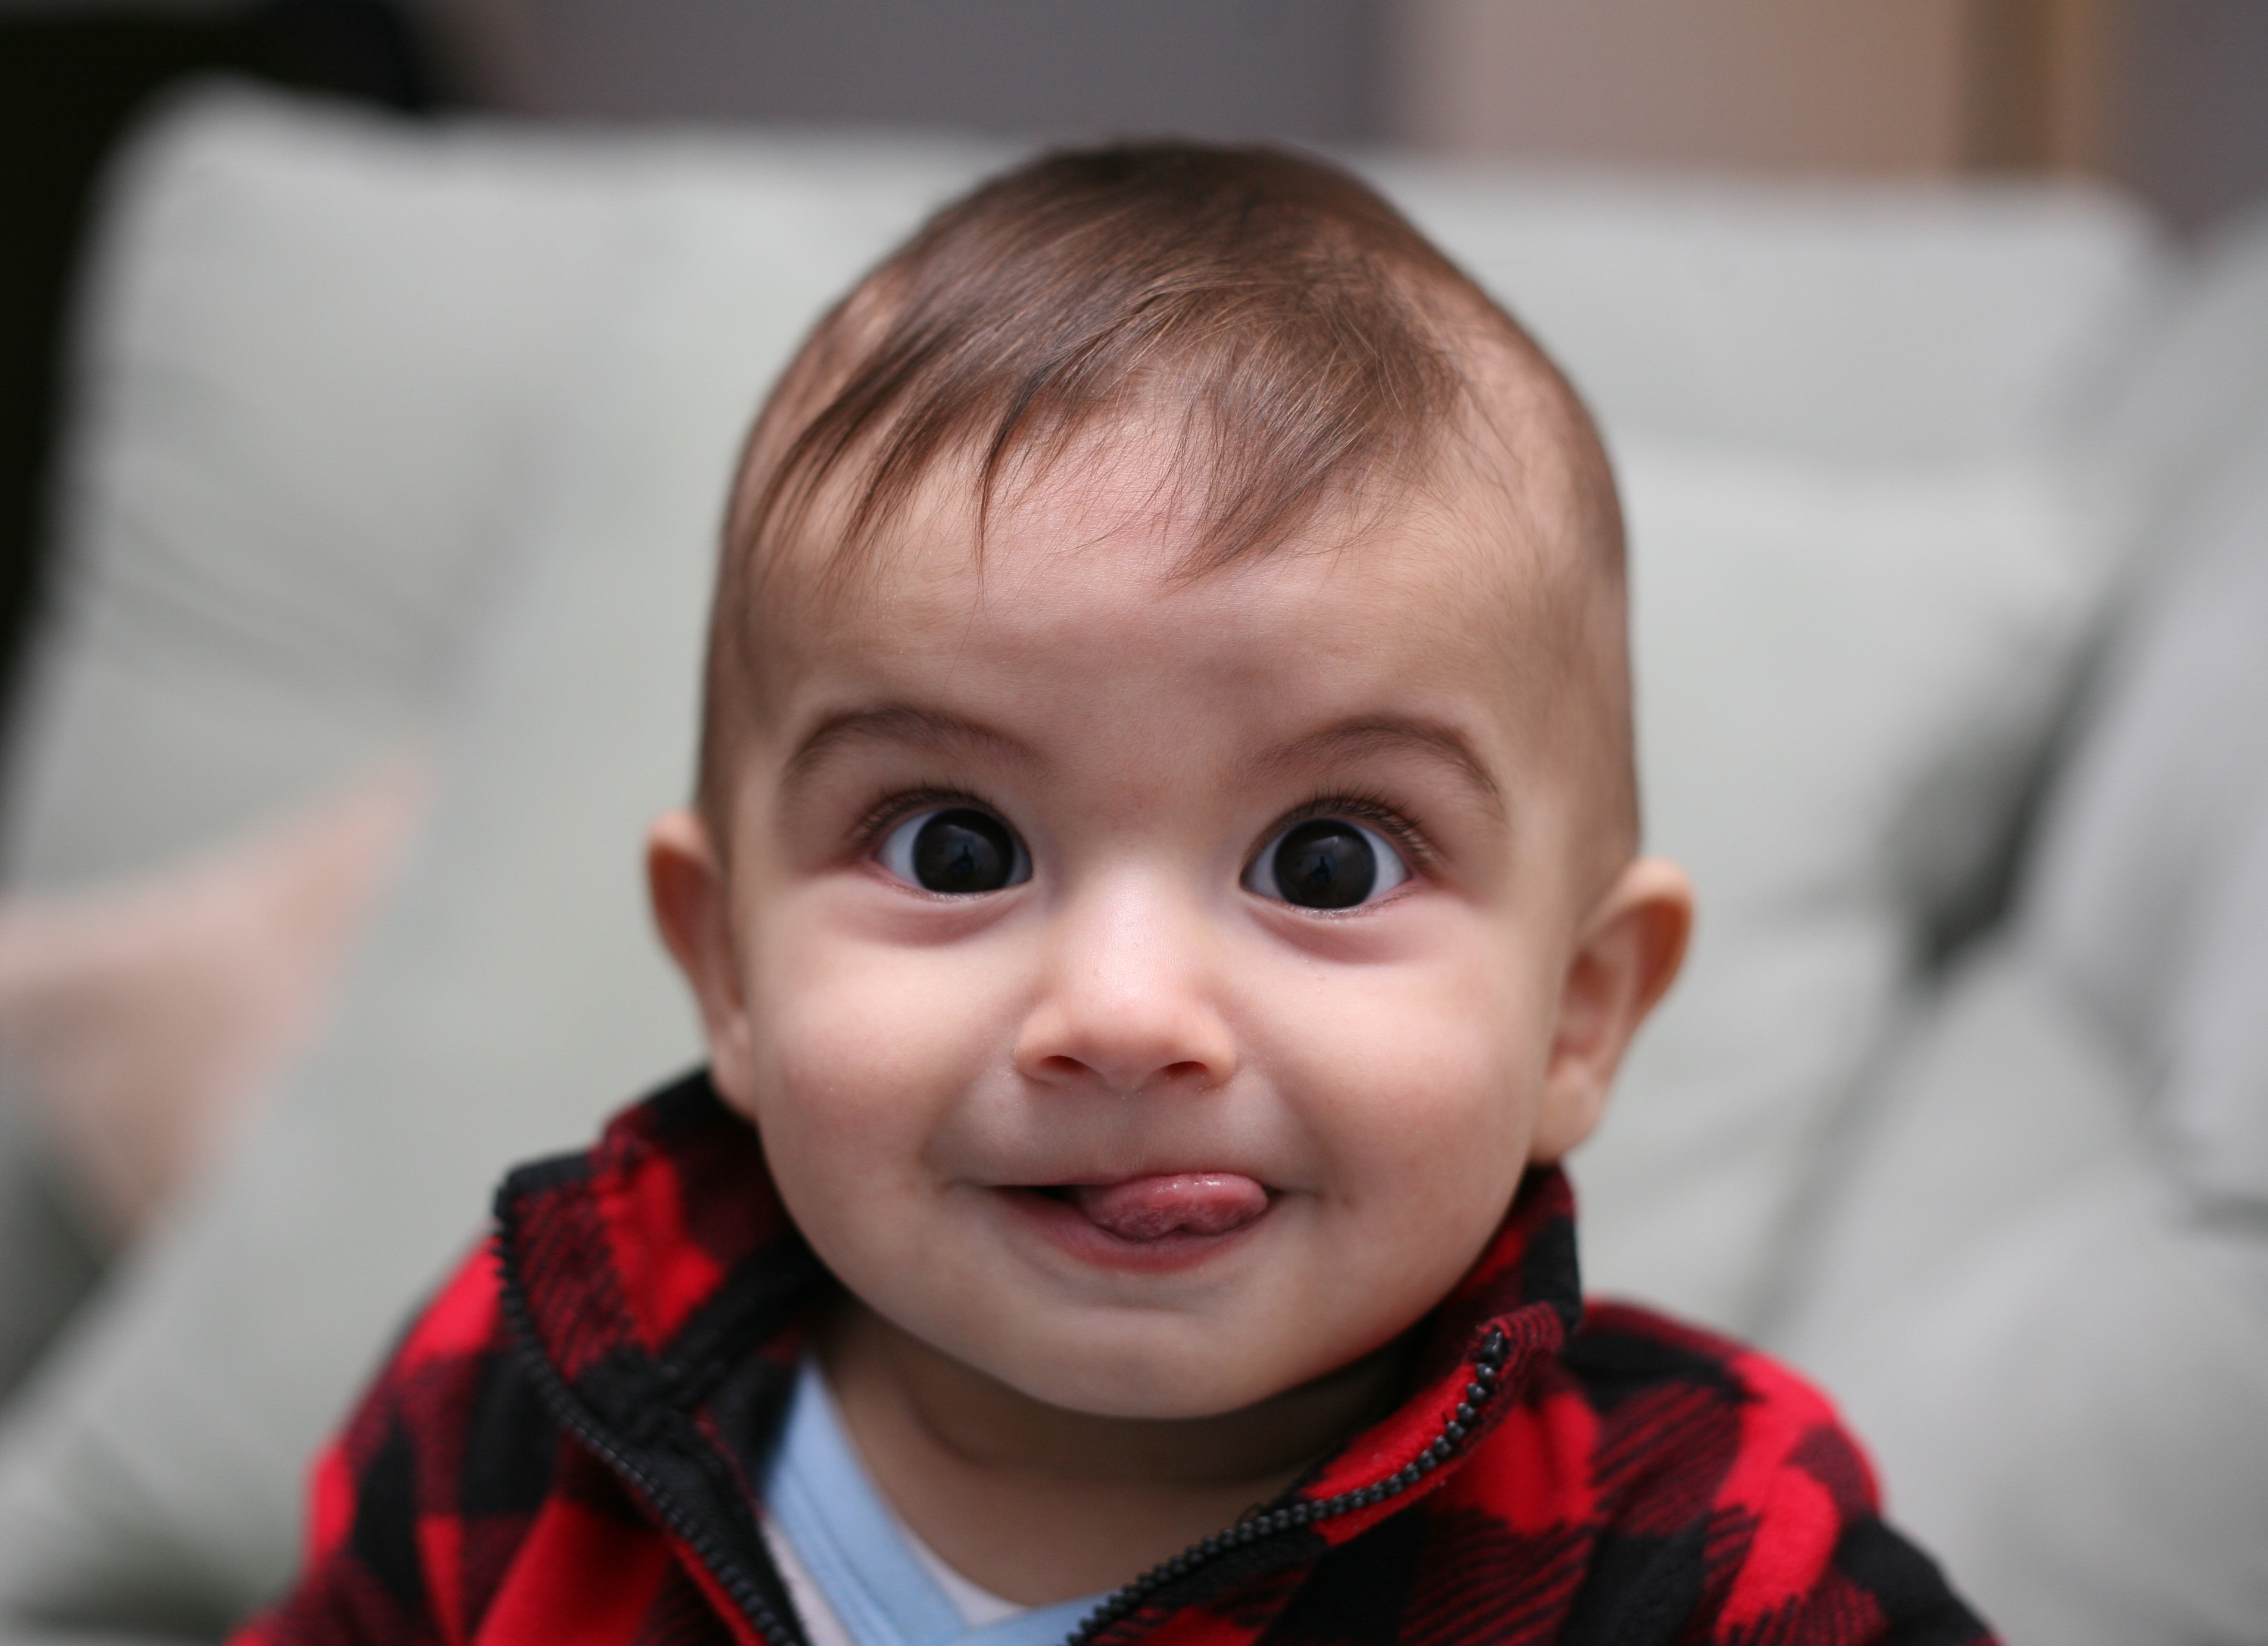

In [ ]:
Image("testbaby1.jpg")